# Step 1: Reading and Understanding the Data


In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

#Import the matplotlib and seborn package
import matplotlib.pyplot as plt
import seaborn as sns

#Import Sklearn Package
from sklearn.model_selection import train_test_split as TRIAN_TEST_SPLIT
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

# Step 2. Load and Explore Dataset

In [2]:
# Read the given CSV file, and view some sample records

bike_share_data = pd.read_csv("download.csv")
bike_share_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Let's inspect the various aspects of our dataframe

bike_share_data.shape
bike_share_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bike_share_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Step 3 : Prepare the Data


## Handle Categorical Variables

In [5]:
# Map season and weathersit to meaningful labels
bike_share_data['season'] = bike_share_data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike_share_data['weathersit'] = bike_share_data['weathersit'].map({
    1: 'Clear',
    2: 'Mist',
    3: 'LightSnow',
    4: 'HeavyRain'
})

# Create dummy variables for categorical features
bike_share_data = pd.get_dummies(bike_share_data, columns=['season', 'weathersit'], drop_first=True)

## Handle unnecessary Columns

In [6]:
# Drop unnecessary columns
bike_share_data.drop(columns=['instant', 'dteday'], inplace=True)

## Drop Redundant Columns

In [7]:
# Drop 'casual' and 'registered' as they contribute to 'cnt'
bike_share_data = bike_share_data.drop(['casual', 'registered'], axis=1)

In [8]:
# Check the first few rows of data
bike_share_data.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_LightSnow,weathersit_Mist
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,True,False,False,False,True
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,False,False,True
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,False,False,False
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,False,False,False
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,False,False,False


# Step 4 : Split the data into features and target

In [9]:
# Split the data into features and target
X = bike_share_data.drop(columns=['cnt'])
y = bike_share_data['cnt']

X.head()
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

# Step 5. Perform Exploratory Data Analysis (EDA)

## Pair Plot

<Figure size 800x500 with 0 Axes>

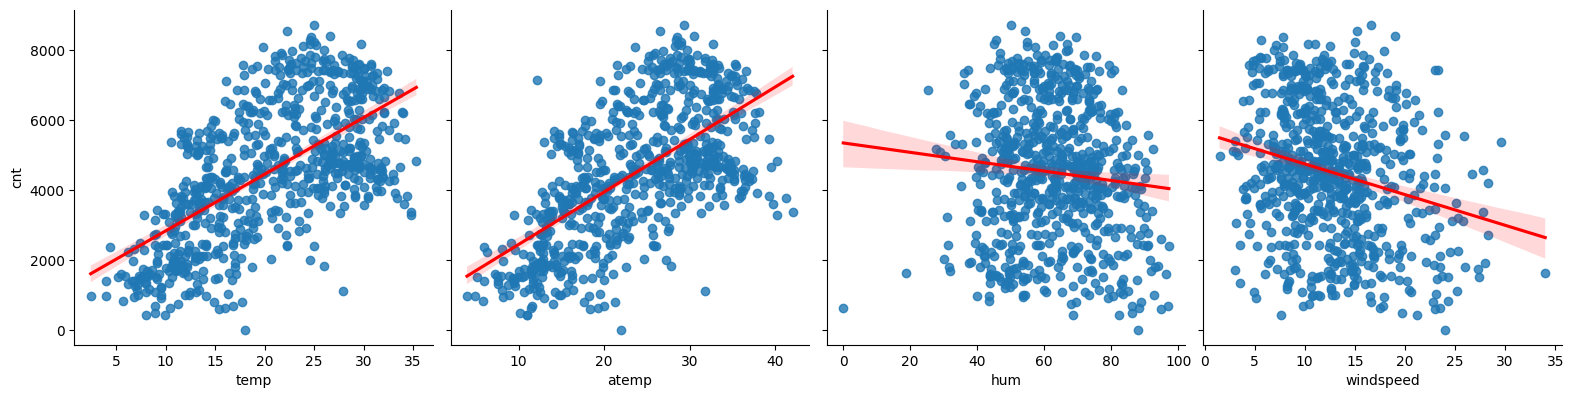

In [10]:
# Visualize the relationship between temperature and bike demand
plt.figure(figsize=(8, 5))
sns.pairplot(bike_share_data,x_vars=['temp', 'atemp', 'hum', 'windspeed'] ,y_vars='cnt',size=4, aspect=1, kind='reg',plot_kws={'line_kws':{'color':'red'}})
plt.show()

## Visualize Dataset Distributions

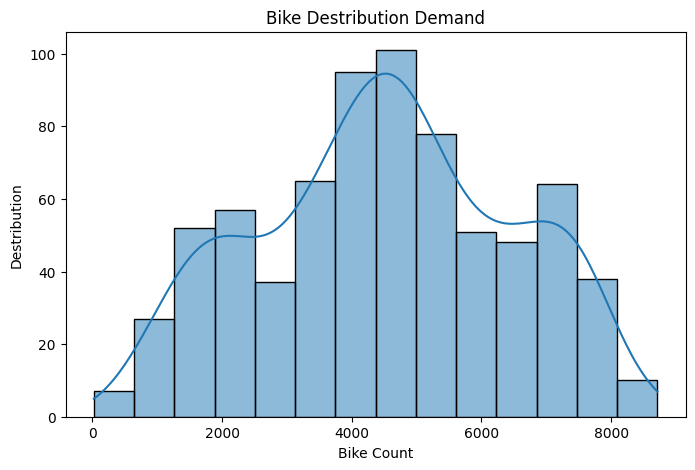

In [11]:
# Analyze categorical variables
plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True)
plt.title('Bike Destribution Demand')
plt.xlabel('Bike Count')
plt.ylabel('Destribution')
plt.show()


## Correlation Heatmap

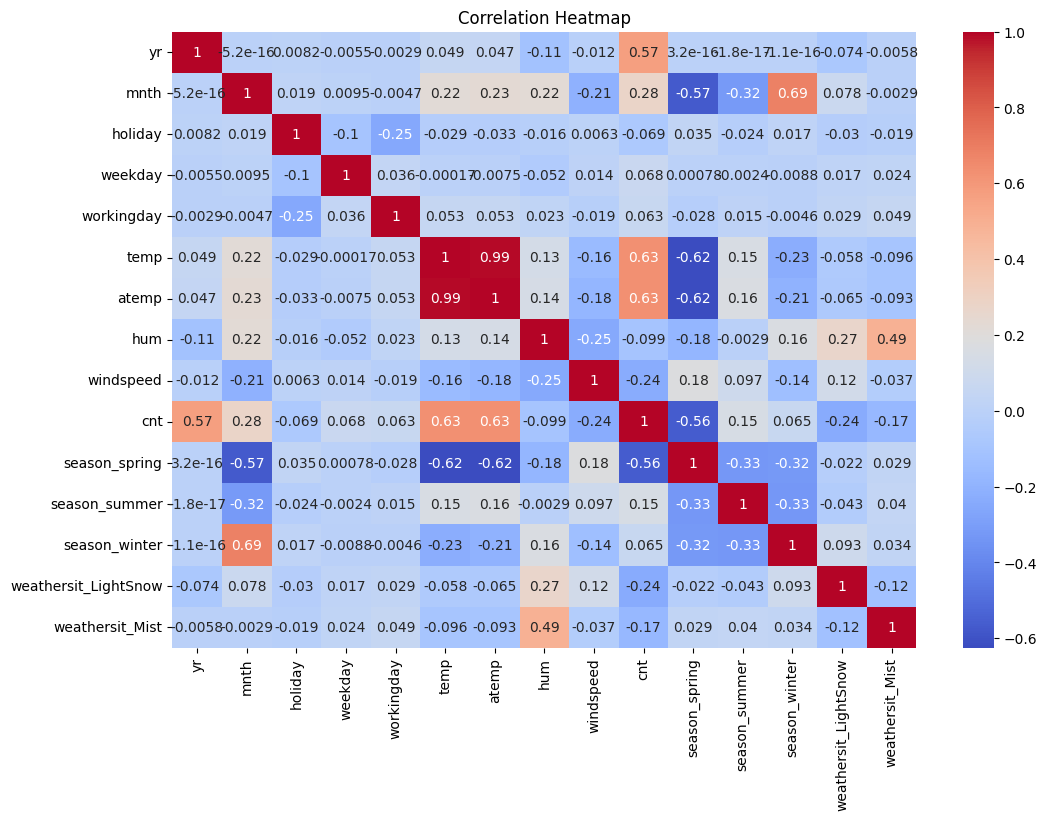

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(bike_share_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 6:Train-Test Split

In [13]:
# Split into training and test sets
X_train, X_test, y_train, y_test = TRIAN_TEST_SPLIT(X, y, test_size=0.2, random_state=42)

In [14]:
# Display Train Shapes
print(f"Training set: {X_train.shape}")

# Display Test Shapes
print(f"Test set: {X_test.shape}")

Training set: (584, 14)
Test set: (146, 14)


## Selection Using RFE (Recursive Feature Elimination)

In [15]:
# Train a linear regression model
Bike_Share_Model = LinearRegression()
rfe = RFE(Bike_Share_Model, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Get selected features
features_selected = X_train.columns[rfe.support_]
print("Features Selected:\n", features_selected)

Features Selected:
 Index(['yr', 'holiday', 'weekday', 'workingday', 'temp', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_LightSnow',
       'weathersit_Mist'],
      dtype='object')


## Prepare Train and Test Sets with Selected Features

In [16]:
# Filter selected features
X_train_rfe = X_train[features_selected]
X_test_rfe = X_test[features_selected]

In [17]:
# Train the model
Bike_Share_Model.fit(X_train_rfe, y_train)

LinearRegression()

In [18]:
# Predict on training and test sets
y_train_pred = Bike_Share_Model.predict(X_train_rfe)
y_test_pred = Bike_Share_Model.predict(X_test_rfe)

# Step 7: Model Evaluation

In [19]:
# Evaluate R-Squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [20]:
# Evaluate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [21]:
print(f"Train R² Score Result: {train_r2:.2f}")
print(f"Train RMSE Result: {train_rmse:.2f}")
print(f"Test R² Score Result: {test_r2:.2f}")
print(f"Test RMSE Result: {test_rmse:.2f}")

Train R² Score Result: 0.81
Train RMSE Result: 852.20
Test R² Score Result: 0.84
Test RMSE Result: 737.77


# Step 8: Residual Analysis

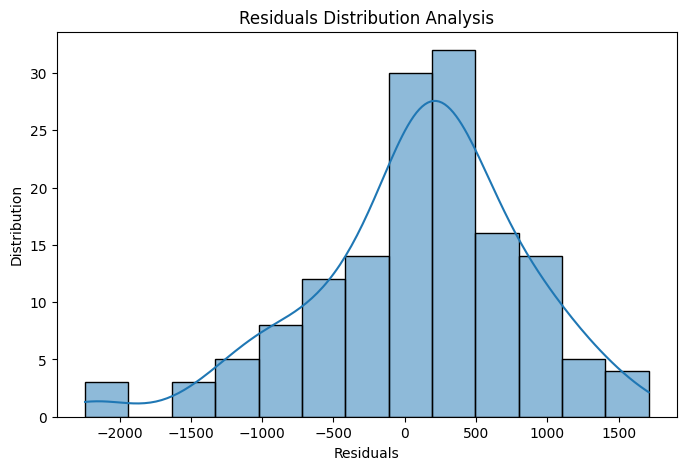

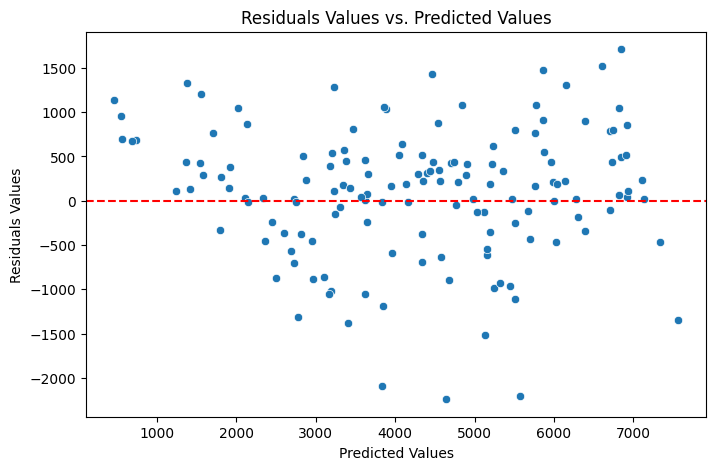

In [22]:
# Residuals for the test set
residuals = y_test - y_test_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution Analysis')
plt.xlabel('Residuals')
plt.ylabel('Distribution')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Values vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals Values')
plt.show()


# Model Performance Evaluation and Explanation
## 1. Model Performance Metrics

- ## Train R² Score: 0.81
    - The model explains 81% of the variance in the training data, indicating good accuracy on familiar data.

- ## Test R² Score: 0.84
    - The model explains 84% of the variance in unseen test data, demonstrating strong generalization.

- ## Train RMSE: 852.20
  - Measures the average prediction error on the training dataset. Lower values indicate better accuracy.
 
- ## Test RMSE: 737.77
  - Measures prediction error on unseen test data. A lower RMSE highlights effective generalization and minimal prediction errors.

## 2. Key Concepts
- ## y_test:
    - Actual target values from the test dataset, representing the observed outcomes used for evaluation.

- ## y_test_pred:
    - Predicted target values generated by the model based on the test dataset features.

- ## R² Score:
    - Indicates how well the model explains the variance in the target variable.
      
      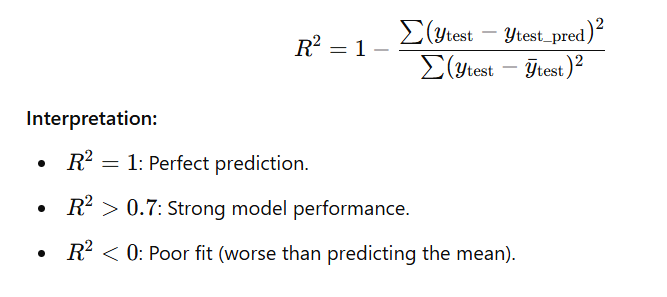

## 3. Insights and Conclusion
- The model performs well on both training and test datasets, with slightly better results on unseen data.
- High R squred values show that the model captures most of the variance in the target variable.
- Low RMSE values indicate accurate predictions with minimal error, confirming the model’s reliability.